# HITS Count Data Analysis

Analysis on general dataset characteristics

In [2]:
import pandas as pd
from time import time
import json

t0 = time()

hits = pd.read_json('datasets/20200126-20200312-hits.json', lines=True)


print('INFO: done reading in dataset to pandas dataframe in %0.3fs.' % (time() - t0))

INFO: done reading in dataset to pandas dataframe in 341.177s.


In [25]:
t0 = time()

print('INFO: sorting hits by creation time')
hits = hits.sort_values('hit_set_id')

print('INFO: finished sorting hits by creation time in %.3fs' % (time() - t0))
hits.head(100)

INFO: sorting hits by creation time
INFO: finished sorting hits by creation time in 29.169s


,_id,hit_set_id,requester_id,requester_name,title,description,assignment_duration_in_seconds,creation_time,assignable_hits_count,latest_expiration_time,caller_meets_requirements,caller_meets_preview_requirements,last_updated_time,monetary_reward,accept_project_task_url,requester_url,project_tasks_url,project_requirements,requesterInfo
675168,{'$oid': '5e5d118957e1a5286a3729f4'},301G7MYOAJ2YTXU1RQ4DF6YHYOC532,A1S51OLVMWXAC8,Michele Rigolizzo,Two-Part Study for a total of $2.50. Part 1 pa...,This is a two part study. Part 1 pays $1 and P...,{'$numberInt': '1800'},2020-03-02 14:00:31+00:00,{'$numberInt': '7'},2020-04-01 14:00:31+00:00,False,False,2020-03-02 14:00:31+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ2YTXU1RQ4DF6YHYOC532/tasks...,/requesters/A1S51OLVMWXAC8/projects?ref=w_pl_prvw,/projects/301G7MYOAJ2YTXU1RQ4DF6YHYOC532/tasks...,[{'qualification_type_id': '37LS5N5SV1PR0ZVHC6...,"{'activityLevel': 'Limited', 'taskApprovalRate..."
828063,{'$oid': '5e613a1e7e1d55505b6211eb'},301G7MYOAJ4JDGPW3YS47DXL2T535X,AL9XTUAY2PZGZ,J N,Multiple studies(~ 7 minutes),A survey on your opinions with a chance to win...,2400,2020-03-05 17:42:44+00:00,44,2020-03-08 17:42:44+00:00,False,False,2020-03-05 17:42:44+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,/requesters/AL9XTUAY2PZGZ/projects?ref=w_pl_prvw,/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'Moderate', 'taskApprovalRat..."
828059,{'$oid': '5e613a197e1d55505b6211e4'},301G7MYOAJ4JDGPW3YS47DXL2T535X,AL9XTUAY2PZGZ,J N,Multiple studies(~ 7 minutes),A survey on your opinions with a chance to win...,2400,2020-03-05 17:42:41+00:00,23,2020-03-08 17:42:41+00:00,False,False,2020-03-05 17:42:41+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,/requesters/AL9XTUAY2PZGZ/projects?ref=w_pl_prvw,/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'Moderate', 'taskApprovalRat..."
829545,{'$oid': '5e6143f728d6d9251cd81307'},301G7MYOAJ4JDGPW3YS47DXL2T535X,AL9XTUAY2PZGZ,J N,Multiple studies(~ 7 minutes),A survey on your opinions with a chance to win...,2400,2020-03-05 18:24:37+00:00,26,2020-03-08 18:24:37+00:00,False,False,2020-03-05 18:24:37+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,/requesters/AL9XTUAY2PZGZ/projects?ref=w_pl_prvw,/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'Moderate', 'taskApprovalRat..."
829539,{'$oid': '5e6143ec28d6d9251cd812fd'},301G7MYOAJ4JDGPW3YS47DXL2T535X,AL9XTUAY2PZGZ,J N,Multiple studies(~ 7 minutes),A survey on your opinions with a chance to win...,2400,2020-03-05 18:24:34+00:00,20,2020-03-08 18:24:34+00:00,False,False,2020-03-05 18:24:34+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,/requesters/AL9XTUAY2PZGZ/projects?ref=w_pl_prvw,/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'Moderate', 'taskApprovalRat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142416,{'$oid': '5e33abf52c7f5f22a3e1bdec'},301G7MYOBKEIY4KG1MZQ3JV9TQS53L,A2WBREJD1LX8IV,Rece Capture,Audit The Receipt Transcription,Audit whether the information contained in the...,1200,2020-01-31 04:23:40+00:00,1,2020-02-05 04:23:40+00:00,True,True,2020-01-31 04:23:40+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOBKEIY4KG1MZQ3JV9TQS53L/tasks...,/requesters/A2WBREJD1LX8IV/projects?ref=w_pl_prvw,/projects/301G7MYOBKEIY4KG1MZQ3JV9TQS53L/tasks...,[{'qualification_type_id': '3D05Y5UXI14XS7D0LO...,"{'activityLevel': 'High', 'taskApprovalRate': ..."
145170,{'$oid': '5e33d5db0a98f020692e64cf'},301G7MYOBKEIY4

In [27]:
print('INFO: shape of HITS df before drop dup: {}'.format(hits.shape))
# hits = hits.drop_duplicates(subset=['hit_set_id', 'creation_time'], keep='first')
print('INFO: shape of HITS df after drop dup: {}'.format(hits.shape))

hits.head(100)


INFO: shape of HITS df before drop dup: (1108702, 19)
INFO: shape of HITS df after drop dup: (1108702, 19)


,_id,hit_set_id,requester_id,requester_name,title,description,assignment_duration_in_seconds,creation_time,assignable_hits_count,latest_expiration_time,caller_meets_requirements,caller_meets_preview_requirements,last_updated_time,monetary_reward,accept_project_task_url,requester_url,project_tasks_url,project_requirements,requesterInfo
675168,{'$oid': '5e5d118957e1a5286a3729f4'},301G7MYOAJ2YTXU1RQ4DF6YHYOC532,A1S51OLVMWXAC8,Michele Rigolizzo,Two-Part Study for a total of $2.50. Part 1 pa...,This is a two part study. Part 1 pays $1 and P...,{'$numberInt': '1800'},2020-03-02 14:00:31+00:00,{'$numberInt': '7'},2020-04-01 14:00:31+00:00,False,False,2020-03-02 14:00:31+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ2YTXU1RQ4DF6YHYOC532/tasks...,/requesters/A1S51OLVMWXAC8/projects?ref=w_pl_prvw,/projects/301G7MYOAJ2YTXU1RQ4DF6YHYOC532/tasks...,[{'qualification_type_id': '37LS5N5SV1PR0ZVHC6...,"{'activityLevel': 'Limited', 'taskApprovalRate..."
828063,{'$oid': '5e613a1e7e1d55505b6211eb'},301G7MYOAJ4JDGPW3YS47DXL2T535X,AL9XTUAY2PZGZ,J N,Multiple studies(~ 7 minutes),A survey on your opinions with a chance to win...,2400,2020-03-05 17:42:44+00:00,44,2020-03-08 17:42:44+00:00,False,False,2020-03-05 17:42:44+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,/requesters/AL9XTUAY2PZGZ/projects?ref=w_pl_prvw,/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'Moderate', 'taskApprovalRat..."
828059,{'$oid': '5e613a197e1d55505b6211e4'},301G7MYOAJ4JDGPW3YS47DXL2T535X,AL9XTUAY2PZGZ,J N,Multiple studies(~ 7 minutes),A survey on your opinions with a chance to win...,2400,2020-03-05 17:42:41+00:00,23,2020-03-08 17:42:41+00:00,False,False,2020-03-05 17:42:41+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,/requesters/AL9XTUAY2PZGZ/projects?ref=w_pl_prvw,/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'Moderate', 'taskApprovalRat..."
829545,{'$oid': '5e6143f728d6d9251cd81307'},301G7MYOAJ4JDGPW3YS47DXL2T535X,AL9XTUAY2PZGZ,J N,Multiple studies(~ 7 minutes),A survey on your opinions with a chance to win...,2400,2020-03-05 18:24:37+00:00,26,2020-03-08 18:24:37+00:00,False,False,2020-03-05 18:24:37+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,/requesters/AL9XTUAY2PZGZ/projects?ref=w_pl_prvw,/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'Moderate', 'taskApprovalRat..."
829539,{'$oid': '5e6143ec28d6d9251cd812fd'},301G7MYOAJ4JDGPW3YS47DXL2T535X,AL9XTUAY2PZGZ,J N,Multiple studies(~ 7 minutes),A survey on your opinions with a chance to win...,2400,2020-03-05 18:24:34+00:00,20,2020-03-08 18:24:34+00:00,False,False,2020-03-05 18:24:34+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,/requesters/AL9XTUAY2PZGZ/projects?ref=w_pl_prvw,/projects/301G7MYOAJ4JDGPW3YS47DXL2T535X/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'Moderate', 'taskApprovalRat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142416,{'$oid': '5e33abf52c7f5f22a3e1bdec'},301G7MYOBKEIY4KG1MZQ3JV9TQS53L,A2WBREJD1LX8IV,Rece Capture,Audit The Receipt Transcription,Audit whether the information contained in the...,1200,2020-01-31 04:23:40+00:00,1,2020-02-05 04:23:40+00:00,True,True,2020-01-31 04:23:40+00:00,"{'currency_code': 'USD', 'amount_in_dollars': ...",/projects/301G7MYOBKEIY4KG1MZQ3JV9TQS53L/tasks...,/requesters/A2WBREJD1LX8IV/projects?ref=w_pl_prvw,/projects/301G7MYOBKEIY4KG1MZQ3JV9TQS53L/tasks...,[{'qualification_type_id': '3D05Y5UXI14XS7D0LO...,"{'activityLevel': 'High', 'taskApprovalRate': ..."
145170,{'$oid': '5e33d5db0a98f020692e64cf'},301G7MYOBKEIY4

### Unique requester in dataset

In [28]:
hits['requester_id'].nunique()



4014

### Unique Requester's by name

In [29]:
hits['requester_name'].nunique()



3950

### Top Requesters by HITs issued

In [30]:
hits['requester_name'].value_counts().head(10)

Panel                400699
Ibotta, Inc.          57289
411Richmond           55919
Shopping Receipts     49162
p9r                   44926
Rece Capture          36025
MLDataLabeler         34017
Crowdsurf Support     31734
TeamZ                 31336
lovergingers          24841
Name: requester_name, dtype: int64

In [1]:
hits['requester_name'].value_counts()

NameError: name 'hits' is not defined

### total number of hits

In [31]:
print(hits.shape[0])
requester_hits = hits['requester_name'].value_counts().tolist()
# print(requester_hits)
print('total num_hits: ', sum(requester_hits))

# print(requester_hits_name)
# requester_hits.plot.pie(y='requester_name', figsize=(5, 5))

1108702
total num_hits:  1108702


### number of hits from top 10 requesters

In [32]:
top_ten_count = sum(requester_hits[:10])

print('top_ten_count:', top_ten_count)


top_ten_count: 765948


### number of hits from the rest of the requesters

In [33]:
print('rest of requesters: ', sum(requester_hits[10:]))

rest of requesters:  342754


### PiChart of top 10 requesters

['Panel', 'Ibotta, Inc.', '411Richmond', 'Shopping Receipts', 'p9r', 'Rece Capture', 'MLDataLabeler', 'Crowdsurf Support', 'TeamZ', 'lovergingers', 'Rest of Requesters']
[400699, 57289, 55919, 49162, 44926, 36025, 34017, 31734, 31336, 24841, 342754]
11
11
['Requester #1', 'Requester #2', 'Requester #3', 'Requester #4', 'Requester #5', 'Requester #6', 'Requester #7', 'Requester #8', 'Requester #9', 'Requester #10', 'Rest of Requesters']


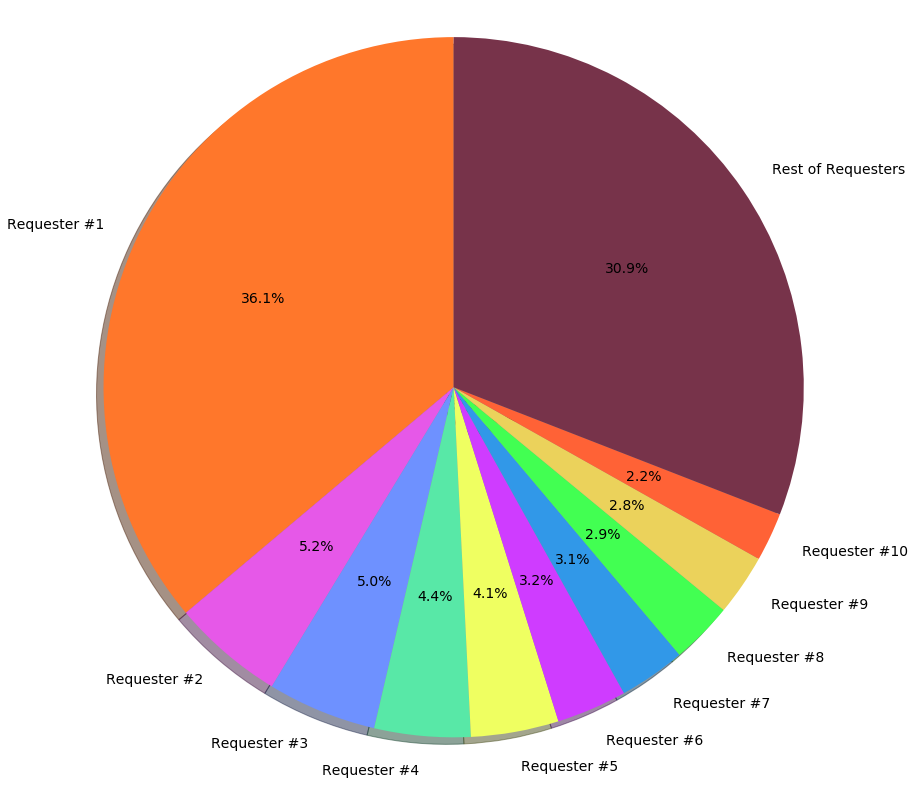

In [34]:
import matplotlib.pyplot as plt

top_requesters = hits['requester_name'].value_counts().index.tolist()
top_requesters = top_requesters[:10]

top_requesters.append('Rest of Requesters')

top_req_hit_cnt = hits['requester_name'].value_counts().tolist()
top_req_hit_cnt = top_req_hit_cnt[:10]

rest_req_hit_cnt = sum(requester_hits[10:])
print(top_requesters)

top_req_hit_cnt.append(rest_req_hit_cnt)

print(top_req_hit_cnt)

print(len(top_req_hit_cnt))


requester_label = [ 'Requester #1', 'Requester #2','Requester #3','Requester #4','Requester #5','Requester #6','Requester #7',
                  'Requester #8','Requester #9', 'Requester #10', 'Rest of Requesters'
                  ]

colors = ['#FF772B', '#E658E8', '#6E91FF', '#58E8A7', '#EFFF61', 
          '#CF3CFF', '#3198E8', '#42FF52', '#EBD25B', '#FF6236', 
          '#77334a'
         ]
print(len(requester_label))

print(requester_label)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:


fig1, ax1 = plt.subplots(figsize=(14, 14))

ax1.pie(top_req_hit_cnt, labels=requester_label, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.rcParams['font.size'] = 14.0
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('results_figures/hit_analysis/top10-pi.png')
plt.show()


In [13]:

money = pd.json_normalize(hits['monetary_reward'].values)



In [21]:
approval = pd.json_normalize(hits['requesterInfo'].values)

In [22]:
# money.drop(columns=['$numberDouble', '$numberInt'], axis=1)
# money.head()
money.axes
# money.drop(columns=['amount_in_dollars.$numberInt'])


flat_hits = pd.concat([hits,money, approval], axis=1, sort=False)

flat_hits.head()

,_id,hit_set_id,requester_id,requester_name,title,description,assignment_duration_in_seconds,creation_time,assignable_hits_count,latest_expiration_time,...,project_tasks_url,project_requirements,requesterInfo,currency_code,amount_in_dollars.$numberInt,amount_in_dollars,amount_in_dollars.$numberDouble,activityLevel,taskApprovalRate,taskReviewTime
0,{'$oid': '5e2e07e440666269314f6d76'},3GRRK9BQWROCIFPJTJ74ZZLB6ZIPDI,A13PNDK4YW47PL,amturk,Input specific values displayed in the image.,You will be presented an image of a gym cardio...,3600,2020-01-26 21:42:51+00:00,1,2020-01-27 02:42:51+00:00,...,/projects/3GRRK9BQWROCIFPJTJ74ZZLB6ZIPDI/tasks...,[{'qualification_type_id': '3Q48MW141AXN97AOAE...,"{'activityLevel': 'High', 'taskApprovalRate': ...",USD,1,NaN,NaN,Limited,≥ 99%,less than a day
1,{'$oid': '5e2e07e440666269314f6d77'},345DFELIOAW9BTA7ZVPRUL1PDQGX0G,A3UENPLNM9AQBK,BIU NLP,Write question-answer pairs about verbal nouns...,Given a sentence and a noun from that sentence...,3600,2020-01-26 21:42:50+00:00,34,2020-02-25 21:42:50+00:00,...,/projects/345DFELIOAW9BTA7ZVPRUL1PDQGX0G/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'High', 'taskApprovalRate': ...",USD,NaN,0.5,NaN,Moderate,≥ 99%,3 days
2,{'$oid': '5e2e07e440666269314f6d78'},3JCELWMC3O86LDKV3Z1AWANP7583V6,AAE8HYZ2P1HCS,A2Z,Data Entry from images (P641),Transcribing data from image,600,2020-01-26 21:42:49+00:00,1,2020-02-02 21:42:49+00:00,...,/projects/3JCELWMC3O86LDKV3Z1AWANP7583V6/tasks...,[{'qualification_type_id': '000000000000000000...,"{'activityLevel': 'High', 'taskApprovalRate': ...",USD,NaN,0.5,NaN,Moderate,≥ 99%,3 days
3,{'$oid': '5e2e07e440666269314f6d79'},320GLP60AN5TS9K5PU8IGRVPKUZ14P,A38RXMI7DFPL8G,411Richmond,Extract purchased items from a shopping receip...,Extract all the items from the receipt. You wi...,5400,2020-01-26 21:42:46+00:00,1,2020-02-02 21:42:46+00:00,...,/projects/320GLP60AN5TS9K5PU8IGRVPKUZ14P/tasks...,[],"{'activityLevel': 'High', 'taskApprovalRate': ...",USD,NaN,0.5,NaN,Moderate,≥ 99%,3 days
4,{'$oid': '5e2e07e440666269314f6d7a'},389X50RO3UCP2CYKCYM14K9RJJI439,A38RXMI7DFPL8G,411Richmond,Verify a single value from a receipt,Verify the value of single data point (such as...,1800,2020-01-26 21:42:46+00:00,6,2020-02-02 21:42:46+00:00,...,/projects/389X50RO3UCP2CYKCYM14K9RJJI439/tasks...,[],"{'activityLevel': 'High', 'taskApprovalRate': ...",USD,NaN,0.5,NaN,Moderate,≥ 99%,3 days
